<a href="https://colab.research.google.com/github/juandahur/ML-UdeA-Reto-Tec/blob/main/Reto_Tecnologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RETO TECNÓLOGICO
##Alejandro Correa - Juan David Hurtado 


##Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import json
import folium

##Lectura de bases de datos

A lo largo del trabajo se tomaran bases de datos diferentes que se utilizaron para lograra aplicar todas las tareas comprendidadas dentro del reto

In [ ]:
airports = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airports.csv')
departures_MDE_nal = pd.read_csv('http://medata.gov.co/sites/default/files/medata_harvest_files/salida_mensual_pasajeros_aeropuertos_destino_nacional.csv',sep=';')
ticket_dataset = pd.read_csv('/content/sample_data/ticket_dataset_MOW.csv',sep=';')
origen_destino = pd.read_csv('/content/sample_data/BD.csv', sep=',')


with open('/content/sample_data/IATA_Airlines.json','r') as f:
    data = json.loads(f.read())

airlines = pd.json_normalize(data, max_level=1)

#airports_freq = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airport-frequencies.csv')
#runways = pd.read_csv('https://davidmegginson.github.io/ourairports-data/runways.csv')
#countries = pd.read_csv('https://davidmegginson.github.io/ourairports-data/countries.csv')
#regions = pd.read_csv('https://davidmegginson.github.io/ourairports-data/regions.csv')
#iso_countries = pd.read_csv('https://datahub.io/core/country-list/r/data.csv')

Para los puntos 1, 2 y 3, con el fin de analizar la necesidad de una nueva pista en el aeropuerto de rionegro se investigaron bases de datos que comprendieran información correspondiente a la actividad de los aeropuertos en Colombia. 

Fuente : página web https://www.aerocivil.gov.co/atencion/estadisticas-de-las-actividades-aeronauticas/bases-de-datos. En adición, para el analisis de la información se tomo como rango el año 2021 pues durante el 2020 debido a la cuarentena dentro del país, los vuelos se vieron muy afectados en su operación normal.

###1. Agrupe los vuelos por ciudad de destino

Identificar campos con los que se va a trabajar

In [ ]:
origen_destino.head(5) #visualizar base de datos

,Sigla Empresa,Nombre,Fecha,Año,Número de Mes,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
0,0EC,SAE,2021-01-01,2021,1,A06,EL ENCANTO,EL ENCANTO,COLOMBIA,LET,LETICIA-ALFREDO VASQUEZ COBO,LETICIA,COLOMBIA,N,T,3.0,31.81
1,0EC,SAE,2021-01-01,2021,1,A07,MORICHAL VIEJO,SAN JOSE DEL GUAVIARE,COLOMBIA,SJE,SAN JOSE DEL GUAVIARE- JORGE E GONZ,SAN JOSE DEL GUAVIARE,COLOMBIA,N,T,3.0,4.55
2,0EC,SAE,2021-01-01,2021,1,A13,MIRITI PARANA,MIRITI-PARANA,COLOMBIA,LET,LETICIA-ALFREDO VASQUEZ COBO,LETICIA,COLOMBIA,N,T,6.0,22.72
3,0EC,SAE,2021-01-01,2021,1,BMG,BARRANCO MINAS,GUAINIA (BARRANCO MINAS),COLOMBIA,IDA,CESAR GAVIRIA TRUJILLO,PUERTO INIRIDA,COLOMBIA,N,T,3.0,13.63
4,0EC,SAE,2021-01-01,2021,1,CRU,CARURU,CARURU,COLOMBIA,SJE,SAN JOSE DEL GUAVIARE- JORGE E GONZ,SAN JOSE DEL GUAVIARE,COLOMBIA,N,T,6.0,27.27


Con el fin de visiulizar los destinos más populares dentro del páis se agrupará y ordenera de mayor a menor segun la cantidad de vuelos.

In [ ]:
popularidad = origen_destino.groupby('Ciudad Destino').size().to_frame('Cuenta').reset_index() #agrupar, contar y crear el data frame
popularidad.sort_values("Cuenta",ascending=False,inplace=True) #ordenar datos de mayor a menor
popularidad2 = popularidad.head(5) #escoger el top 5
popularidad2 #mostrar data frame con los resultados

,Ciudad Destino,Cuenta
60,BOGOTA,11687
360,RIONEGRO - ANTIOQUIA,3594
262,MITU,2606
79,CALI,2225
88,CARTAGENA,2119


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 1.0, '% DE VUELOS POR TOP CIUDADES DESTINO EN 2021')

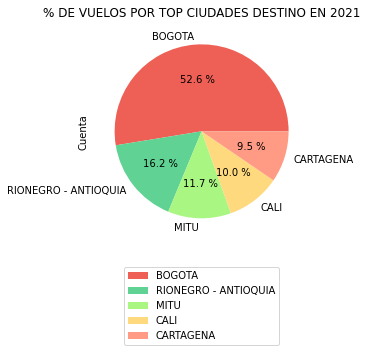

In [ ]:
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"] #conjunto de colores para el gráfico
#generar gráfico tipo torta y características que permitan visualizar mejor
popularidad2.plot(kind='pie', y='Cuenta',labels=popularidad2['Ciudad Destino'],autopct="%0.1f %%", colors= colores) 
fig = plt.figure(1) 
ax = fig.add_subplot(111)
handles, labels = ax.get_legend_handles_labels() 
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
plt.title('% DE VUELOS POR TOP CIUDADES DESTINO EN 2021', fontdict=None, loc=None)

Analizando los 5 ciudades más frecuentes dentro de los vuelos con destino Colombia, se observa que la mayor cantidad de vuelos arriban en la Ciudad de Bogotá, seguida por Rionegro con el 16.2% de los vuelos, le siguen dentro del listado Mitú, Cali y Cartagena dentro de los destino más populares.

##2. Liste los vuelos por aerolínea con destino Rionegro

Es necesario hacer un zoom sobre la actividad que tiene el Aeropuerto José María Cordova, lo cuál nos permite revisar las diferentes aerolíneas que tienen dentro de su oferta este destino, además de la cantidad de vuelos que llegaron en el 2021 para hacerse una idea de la operación del aeropuerto. 

In [ ]:
Rionegro = origen_destino[origen_destino['Ciudad Destino'] == 'RIONEGRO - ANTIOQUIA'] #Filtrar la base de datos para visualizar los registros del aeropuerto JOSE M. CORDOVA
Rionegro.head() #visualizar

,Sigla Empresa,Nombre,Fecha,Año,Número de Mes,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
157,1BC,INTEREJECUTIVA,2021-01-01,2021,1,APF,NAPLES MUNICIPAL,FLORIDA,ESTADOS UNIDOS,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,T,3.0,0.0
159,1BC,INTEREJECUTIVA,2021-01-01,2021,1,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,T,0.0,0.0
162,1BC,INTEREJECUTIVA,2021-01-01,2021,1,CTG,CARTAGENA - RAFAEL NUQEZ,CARTAGENA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,T,16.0,0.0
167,1BC,INTEREJECUTIVA,2021-01-01,2021,1,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,T,0.0,0.0
170,1BC,INTEREJECUTIVA,2021-01-01,2021,1,MMP,MOMPOS - SAN BERNARDO,MOMPOS,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,T,2.0,0.0


In [ ]:
aerolineas = Rionegro.groupby('Nombre').size().to_frame('Cantidad de vuelos').reset_index()
aerolineas.sort_values('Cantidad de vuelos',ascending=False,inplace=True)
aerolineas2 = aerolineas.head(15)
aerolineas2.head()


,Nombre,Cantidad de vuelos
12,AMERICAN,866
15,AVIANCA,519
5,AEROMEXICO SUCURSAL COLOMBIA,473
47,SPIRIT AIRLINES,344
31,JETBLUE AIRWAYS CORPORATION,285


In [ ]:
def show_value_for_barplot(barplot, h_v="v"):
    if h_v == "v":
        for p in barplot.patches:
            barplot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    elif h_v == "h":
        for p in barplot.patches:
            barplot.annotate(format(p.get_width()), (p.get_width(), p.get_y()+ p.get_height() / 2.), ha = 'center', va = 'center', xytext = (30, 0), textcoords = 'offset points')

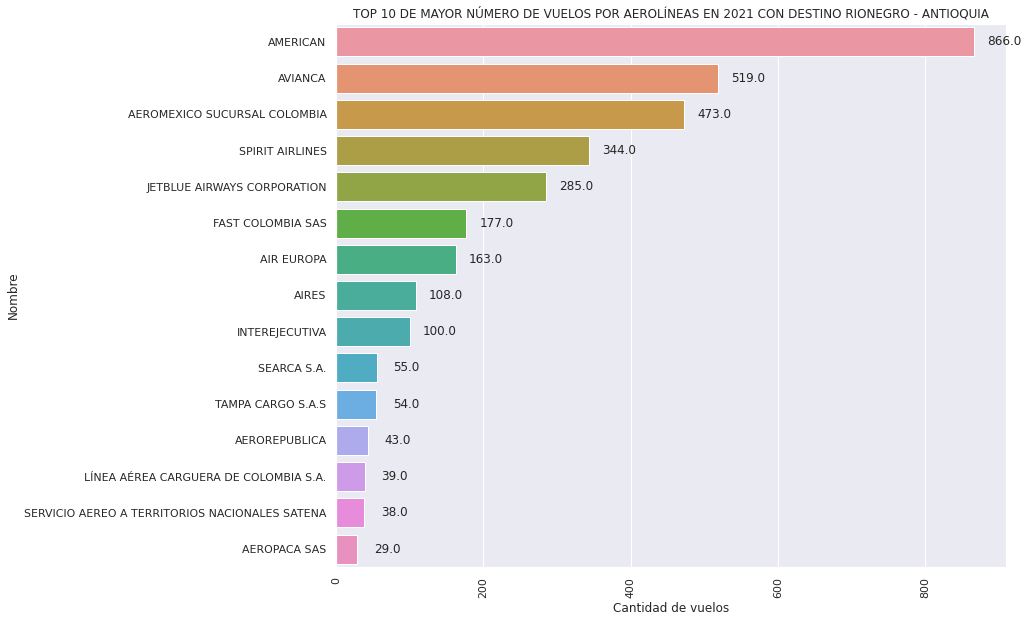

In [ ]:
sns.set(rc={"figure.figsize":(12,10)})
splot = sns.barplot(x ="Cantidad de vuelos", y ="Nombre", data = aerolineas2)
plt.title("TOP 10 DE MAYOR NÚMERO DE VUELOS POR AEROLÍNEAS EN 2021 CON DESTINO RIONEGRO - ANTIOQUIA")
show_value_for_barplot(splot,h_v="h")
plt.xticks(rotation= 90);
plt.show()

##3. Listado de los vuelos por aerolínea , por la ciudad de origen, cantidad de pasajeros movilizados ordenados de mayor a menor y viceversa. El usuario debe elegir el orden de visualización. (Grafico de líneas)

In [ ]:
Pasajeros = origen_destino[['Nombre','Origen','Nombre.1','Pais Origen','Destino','Nombre.2','Pais Destino','Pasajeros']].sort_values('Pasajeros', ascending=False)
Pasajeros

,Nombre,Origen,Nombre.1,Pais Origen,Destino,Nombre.2,Pais Destino,Pasajeros
60199,AVIANCA,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,68743.0
60644,AVIANCA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,BOG,BOGOTA - ELDORADO,COLOMBIA,67959.0
54497,AVIANCA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,BOG,BOGOTA - ELDORADO,COLOMBIA,64290.0
54131,AVIANCA,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,63649.0
48265,AVIANCA,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,58747.0
...,...,...,...,...,...,...,...,...
664,TAC,TBQ,TIMBIQUI,COLOMBIA,CLO,CALI - ALFONSO BONILLA ARAGON,COLOMBIA,NaN
13321,AEROMENEGUA,MVP,MITU,COLOMBIA,MTN,BUENOS AIRES - VAUPES,COLOMBIA,NaN
39156,TURKISH AIRLINES INC,ABJ,ABIDJAN,COSTA DE MARFIL,BOG,BOGOTA - ELDORADO,COLOMBIA,NaN
50140,LAS,LIM,CALLAO /INTL JORGE CHAVEZ,PERU,BOG,BOGOTA - ELDORADO,COLOMBIA,NaN


In [ ]:
aeropuertos_col= airports[airports['iso_country']=='CO']
aeropuertos_col

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
10832,41025,ACM,small_airport,Arica Airport,-2.144851,-71.758389,316.0,NaN,CO,CO-AMA,Arica,no,NaN,ACM,NaN,NaN,NaN,NaN
11106,40810,AGI,small_airport,El Paraíso Airport,8.128611,-73.584722,303.0,SA,CO,CO-CES,Aguachica,no,NaN,NaN,AGI,NaN,NaN,NaN
18243,43979,CO-0001,small_airport,Punta Espada Airport,12.075256,-71.125725,NaN,SA,CO,CO-LAG,Uribia,no,NaN,NaN,NaN,NaN,NaN,NaN
18244,45103,CO-0002,heliport,Banco De La Republica Heliport,1.672222,-78.142222,NaN,SA,CO,CO-NAR,Barbacoas,no,NaN,NaN,BAS,NaN,NaN,NaN
18245,45104,CO-0003,heliport,Banco De La Republica Heliport,1.196944,-77.280000,NaN,SA,CO,CO-NAR,Pasto,no,NaN,NaN,BNC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55070,32320,SKVN,small_airport,Villanueva Airport,4.624720,-72.946900,1002.0,SA,CO,CO-CAS,Villanueva,no,SKVN,NaN,VLA,NaN,NaN,NaN
55071,6176,SKVP,medium_airport,Alfonso López Pumarejo Airport,10.435000,-73.249500,483.0,SA,CO,CO-CES,Valledupar,yes,SKVP,VUP,VUP,NaN,https://en.wikipedia.org/wiki/Valledupar_Airport,NaN
55072,6177,SKVV,medium_airport,Vanguardia Airport,4.167870,-73.613800,1394.0,SA,CO,CO-MET,Villavicencio,yes,SKVV,VVC,VVC,NaN,https://en.wikipedia.org/wiki/La_Vanguardia_Ai...,NaN
55073,30667,SKYA,small_airport,Yaguara Airport,1.544170,-73.933300,812.0,SA,CO,CO-CAQ,San Vicente Del Caguán,no,SKYA,AYG,AYG,NaN,NaN,NaN


In [ ]:
pasajeros_dataset_aeropuertos = Pasajeros.merge(
    aeropuertos_col[['latitude_deg','longitude_deg','local_code']],
    left_on = 'Origen',
    right_on = 'local_code',
    how = 'left'
)[['Origen','Nombre.1','latitude_deg','longitude_deg','Pasajeros',]]
df_without_duplicates = pasajeros_dataset_aeropuertos.drop_duplicates(subset=['Nombre.1'])
este = df_without_duplicates.dropna()
este


,Origen,Nombre.1,latitude_deg,longitude_deg,Pasajeros
0,BOG,BOGOTA - ELDORADO,4.701590,-74.146900,68743.0
1,MDE,RIONEGRO - JOSE M. CORDOVA,6.164540,-75.423100,67959.0
8,CTG,CARTAGENA - RAFAEL NUQEZ,10.442400,-75.513000,54282.0
15,CLO,CALI - ALFONSO BONILLA ARAGON,3.543220,-76.381600,48238.0
48,BAQ,BARRANQUILLA-E. CORTISSOZ,10.889600,-74.780800,39091.0
...,...,...,...,...,...
57474,BVA,BUENAVISTA,10.887900,-72.900400,0.0
57751,LMS,LOS MANGOS - TOLIMA,3.915833,-74.981944,0.0
61542,VIH,VISTA HERMOSA,3.146667,-73.771111,0.0
61822,LPV,RANCHO ALEGRE,5.322778,-69.950556,0.0


In [ ]:
from folium.plugins import HeatMap #importar desde librería
mapa = folium.Map(location=[4.90917,-70.89934],zoom_start=6, control_scale=True, tiles ="OpenStreetMap") #crear mapa plano
datos = zip(este['latitude_deg'], este['longitude_deg'], este['Pasajeros']) #crear el conjutno de datos a graficar
calor = HeatMap(datos, min_opacity=0.2, max_val=este["Pasajeros"].max(), radius=50, blur=50, max_zoom=6.5) #dar características al mapa
mapa.add_child(calor)#agregar los datos
mapa #mostar mapa

In [ ]:
pop

NameError: ignored

##4. Dado un parámetro de entrada y orden seleccionado, liste la aerolínea con mayores y menores ingresos por ruta. 


No se pudo encontrar información del historial de costos de los tíquetes vendidos con origen el aeropuerto de Medellín por lo cual se usó la información del dataset suministrado por el profesor en el reto original que cuenta con la información de los vuelos con origen el Aeropuerto de Moscú.

Se descarga el dataset y se analiza su contenido

In [ ]:
ticket_dataset.head()

,Unnamed: 0,value,trip_class,origin,number_of_changes,gate,found_at,distance,destination,depart_date,airline,actual
0,0,10570.0,0,MOW,1.0,Kiwi.com,2022-02-09T07:12:09,0,SPU,25/02/2022,N4,True
1,1,7290.0,0,MOW,2.0,Kiwi.com,2022-02-03T12:52:42,0,SZF,23/02/2022,A4,True
2,2,8130.0,0,MOW,1.0,KupiBilet.ru,2022-02-09T07:10:22,0,ABA,21/02/2022,WZ,True
3,3,8220.0,0,MOW,1.0,Kiwi.com,2022-02-09T09:46:49,0,CAI,28/02/2022,DP,True
4,4,6819.0,0,MOW,2.0,Kiwi.com,2022-02-09T06:08:41,0,GZT,16/02/2022,DP,True


Se usa el dataset de aeropuertos y se cambia el código IATA por el nombre de la ciudad en el dataset de tiquetes

In [ ]:
ticket_dataset_ciudades = ticket_dataset.merge(
    airports[['municipality','iata_code']],
    left_on = 'destination',
    right_on = 'iata_code',
    how = 'left'
)[['municipality','airline','depart_date','number_of_changes','value',]]
#[['municipality','airline','value']].head(30)
ticket_dataset_ciudades

,municipality,airline,depart_date,number_of_changes,value
0,Split,N4,25/02/2022,1.0,10570.0
1,Samsun,A4,23/02/2022,2.0,7290.0
2,Abakan,WZ,21/02/2022,1.0,8130.0
3,Cairo,DP,28/02/2022,1.0,8220.0
4,Gaziantep,DP,16/02/2022,2.0,6819.0
...,...,...,...,...,...
4786,"Kowloon City, Kowloon",TK,28/12/2022,1.0,23341.0
4787,Phu Quoc Island,QR,28/12/2022,3.0,44964.0
4788,Yerevan,S7,6/12/2022,0.0,5830.0
4789,Novy Urengoy,S7,16/12/2022,0.0,8443.0


In [ ]:
ticket_dataset_ciudades.sort_values('number_of_changes',ascending=True,inplace=True)
ticket_dataset_ciudades

,municipality,airline,depart_date,number_of_changes,value
3494,Khabarovsk,N4,28/08/2022,0.0,11868.0
3683,Irkutsk,DP,16/09/2022,0.0,5584.0
924,Perm,DP,10/03/2022,0.0,2199.0
923,Tyumen,N4,14/03/2022,0.0,2322.0
3687,Thessaloniki,A3,30/09/2022,0.0,6703.0
...,...,...,...,...,...
4546,Wellington,PR,26/12/2022,4.0,84355.0
3929,Mendoza,AV,27/10/2022,4.0,60107.0
1338,Guayaquil,AV,10/04/2022,4.0,24782.0
2474,NaN,AF,21/06/2022,4.0,34728.0


Se usa el dataset de aerolíneas y se cambia el código de la aerolínea por el nombre la misma en el dataset de tiquetes. Se guarda en la variable df_ciudades_aerolineas.

In [ ]:
df_ciudades_aerolineas = ticket_dataset_ciudades.merge(
    airlines[['name_translations.en','code']],
    left_on = 'airline',
    right_on = 'code',
    how = 'left'
)[['municipality','name_translations.en','depart_date','number_of_changes','value']]
df_ciudades_aerolineas.rename(columns={'municipality':'Ciudad',
                        'name_translations.en':'Aerolinea', 'depart_date': 'Fecha Salida','number_of_changes': 'Numero de cambios','value':'Valor'},
               inplace=True)
df_ciudades_aerolineas.head()

,Ciudad,Aerolinea,Fecha Salida,Numero de cambios,Valor
0,Khabarovsk,Nordwind Airlines,28/08/2022,0.0,11868.0
1,Irkutsk,Pobeda,16/09/2022,0.0,5584.0
2,Perm,Pobeda,10/03/2022,0.0,2199.0
3,Tyumen,Nordwind Airlines,14/03/2022,0.0,2322.0
4,Thessaloniki,Aegean Airlines,30/09/2022,0.0,6703.0


Sumatoria de costos de tiquetes por ruta por aerolínea

In [ ]:
#ticket_dataset_ruta = ticket_dataset[['destination','value','airline']].groupby(['destination','airline','value']).sum().sort_values('destination',ascending=True).reset_index()
df_suma_destino_aerolinea = df_ciudades_aerolineas.groupby(['Ciudad','Aerolinea']).sum('Valor').sort_values('Ciudad',ascending=True).reset_index()
df_suma_destino_aerolinea.head(5)


,Ciudad,Aerolinea,Valor
0,Aalborg,Air France,18144.0
1,Aalborg,Finnair,19389.0
2,Aarhus,Wizz Air,11572.0
3,Abakan,NordStar,8150.0
4,Abakan,Nordwind Airlines,15592.0


Con el siguiente código se obtiene el listado de ciudades destino del aeropuerto de Moscú para seleccionar a continuación

In [ ]:
df_suma_destino_aerolinea['Ciudad'].unique()

Para el ejercicio práctico se usa la ciudad de Miami y un orden Ascendente

In [ ]:
ciudad_seleccionada = 'Miami'

orden = 'A' 

if orden == 'A':
  ascendente = True
  orden_graficar = 'Ascendente'
elif orden == 'D':
  ascendente = False
  orden_graficar = 'Descendente'

df_max_min_destino = df_suma_destino_aerolinea[df_suma_destino_aerolinea['Ciudad']==ciudad_seleccionada].sort_values('Valor',ascending = orden )
df_max_min_destino

,Ciudad,Aerolinea,Valor
1154,Miami,Aeroflot,21696.0
1155,Miami,Turkish Airlines,187549.0


Se gráfica donde se puede observar la gran diferencia entre el costo de viajar por la aerolínea Aeroflot y Turkish Airlines.

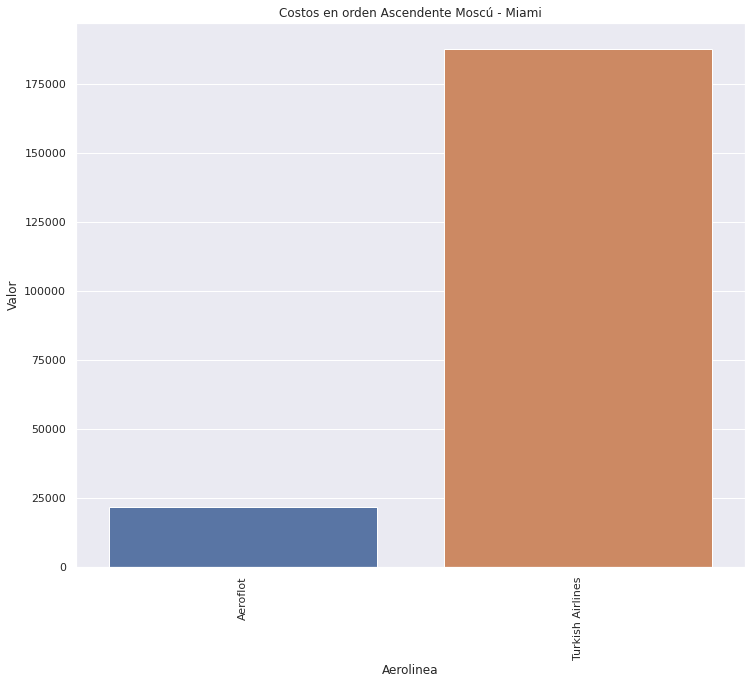

In [ ]:
sns.set(rc={"figure.figsize":(12,10)})
sns.barplot(x ="Aerolinea", y ="Valor", data = df_max_min_destino)
plt.title(f"Costos en orden {orden_graficar} Moscú - {ciudad_seleccionada}")
plt.xticks(rotation= 90);
plt.show()

##5. Halle costo promedio de pasaje por vuelo, calcule el ingreso promedio por vuelo por ciudad


Costo promedio de tiquetes por ciudad destino

In [ ]:
Valor_Promedio = df_ciudades_aerolineas[['Ciudad','Valor']].groupby('Ciudad').mean().reset_index()
Valor_Promedio.head(5)

,Ciudad,Valor
0,Aalborg,12511.000000
1,Aarhus,11572.000000
2,Abakan,9884.200000
3,Aberdeen,11505.666667
4,Abha,32250.500000


Seleccionar las 30 rutas mas costosas y se almacena en la variable Valor_Promedio_g

In [ ]:
Valor_Promedio_g = Valor_Promedio.sort_values('Valor',ascending=False).head(10)
Valor_Promedio_g.head(5)

NameError: ignored

Se usa la librería Seaborn para graficar. Se puede observar que la ciudad mas costosa está ubicada en la China y es algo que no se esperaría que ya que por ubicación en el mapa no es la mas lejana y si la comparamos con la última ciudad de la lista que es Camberra en Australia varias veces mas cerca. También se debe precisar que no se encuentra en este listado ninguna de las grandes capitales del mundo lo que indica que para estas es menor el costo debido a la frecuencia de vuelos. 

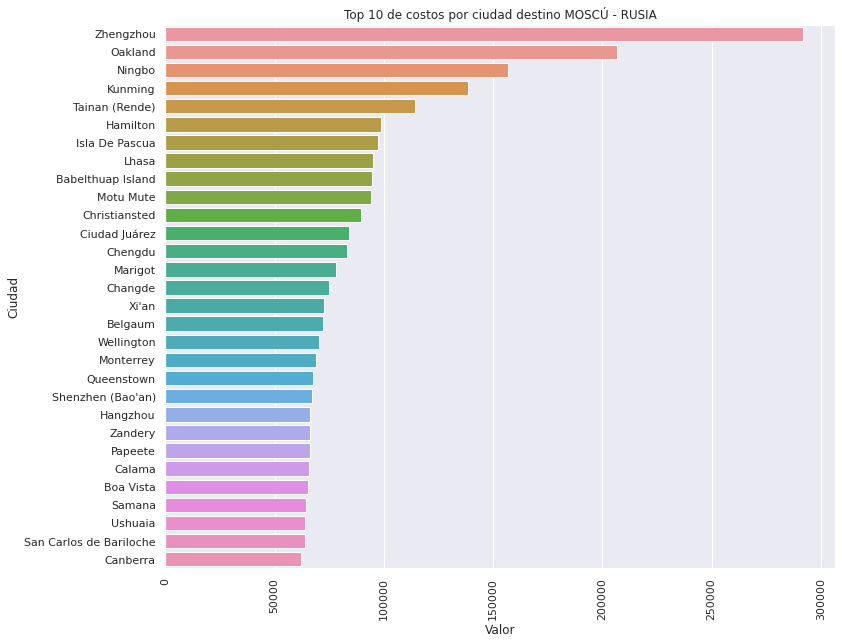

In [ ]:
sns.set(rc={"figure.figsize":(12,10)})
sns.barplot(x ="Valor", y ="Ciudad", data = Valor_Promedio_g)
plt.title("Top 10 de costos por ciudad destino MOSCÚ - RUSIA")
plt.xticks(rotation= 90);
plt.show()

##6. Entregue el total de pasajeros movilizados por inventario agrupado por categoría de producto.


Con la información que se tiene en el dataset no es posible encontrar categorías de productos por lo cual se revisa y se obtiene una columna que es la de número de cambios que está relacionada con el número de cambios en los vuelos.

In [ ]:
df_ciudades_aerolineas.head()

NameError: ignored

In [ ]:
df_ciudades_numero_cambios_mayor = df_ciudades_aerolineas.groupby(['Ciudad','Numero de cambios']).mean().reset_index().sort_values('Valor',ascending=False).head(30)

Al graficar con respecto al numero de cambios no se obtiene una relación directa a que esta variable afecte el costo de los tíquetes.

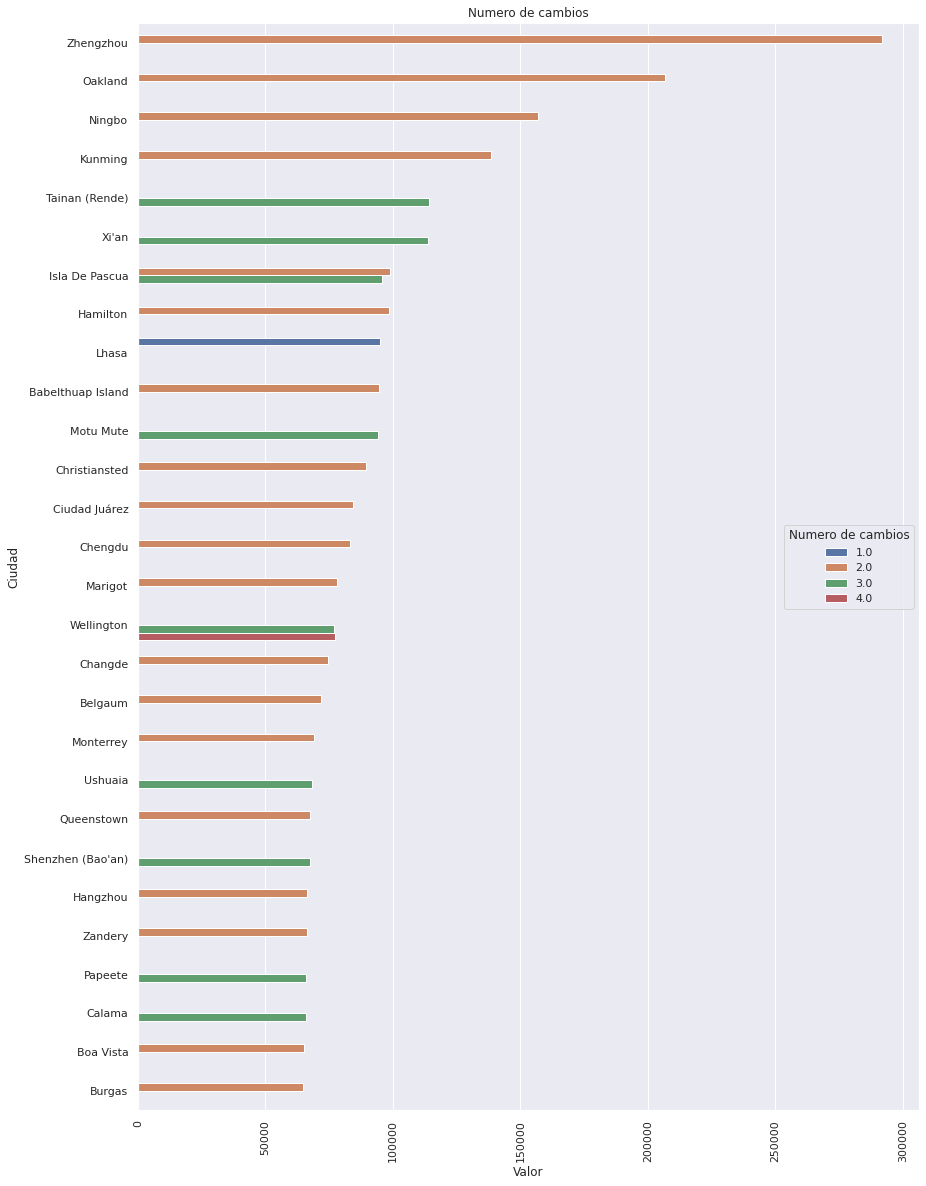

In [ ]:
sns.set(rc={"figure.figsize":(14,20)})
sns.barplot(x ="Valor", y ="Ciudad", data = df_ciudades_numero_cambios_mayor, hue = 'Numero de cambios')
plt.title("Numero de cambios")
plt.xticks(rotation= 90);
plt.show()

##7. Costo por ruta por aerolínea en un rango de tiempo ingresado por teclado


Inicialmente se debe cambiar el tipo de la columna 'Fecha Salida' que en el momento es tipo 'objeto'

In [ ]:
df_ciudades_aerolineas.dtypes

Ciudad           object
Aerolinea        object
Fecha Salida     object
Valor           float64
dtype: object

Se cambia el tipo de columna 'Fecha Salida' a datetime

In [ ]:
df_ciudades_aerolineas['Fecha Salida']= pd.to_datetime(df_ciudades_aerolineas['Fecha Salida'])
df_ciudades_aerolineas.dtypes

Ciudad                       object
Aerolinea                    object
Fecha Salida         datetime64[ns]
Numero de cambios           float64
Valor                       float64
dtype: object

Se solicita el intervalo de fecha que se desea

In [ ]:
#fecha_inicial = '2022-01-10'
#fecha_final = '2022-01-30'
def comprobar_fecha(text):
    try:
        datetime.datetime.strptime(text, '%Y-%m-%d')
    except:
        return "El formato debe ser  YYYY-MM-DD"
    return datetime.datetime.strptime(text, '%Y-%m-%d')

fecha_inicial = input("Ingresa la fecha inicial: ")
comprobar_fecha(fecha_inicial)
fecha_final = input("Ingresa la fecha final: ")
comprobar_fecha(fecha_final)

df_ciudades_aerolineas_fecha = df_ciudades_aerolineas[
                        (df_ciudades_aerolineas['Fecha Salida'] > fecha_inicial) &
                        (df_ciudades_aerolineas['Fecha Salida'] < fecha_final)
]
df_ciudades_aerolineas_fecha

Ingresa la fecha inicial: 2022-01-10
Ingresa la fecha final: 2022-01-30


,Ciudad,Aerolinea,Fecha Salida,Numero de cambios,Valor
642,Ulan Ude,S7 Airlines,2022-01-11,0.0,11412.0
710,Saratov,S7 Airlines,2022-01-11,0.0,3585.0
990,Hurghada,S7 Airlines,2022-01-12,0.0,8873.0
1103,Riga,airBaltic,2022-01-12,0.0,6990.0
1509,Cairo,Aegean Airlines,2022-01-11,1.0,8928.0
...,...,...,...,...,...
4716,Kingston,Turkish Airlines,2022-01-12,3.0,36348.0
4728,Asunción,Turkish Airlines,2022-01-12,3.0,51972.0
4773,Vancouver,Westjet,2022-01-11,4.0,34109.0
4775,Santo Domingo,Turkish Airlines,2022-01-11,4.0,35113.0


Se encuentra la sumatoria del costo por trayecto y por aerolínea

In [ ]:
df_ciudades_aerolineas_fecha_g = df_ciudades_aerolineas_fecha.groupby(['Ciudad','Aerolinea']).sum('Valor').reset_index().sort_values('Valor',ascending=False).head(20)
df_ciudades_aerolineas_fecha_g.head()

,Ciudad,Aerolinea,Numero de cambios,Valor
14,Everett,Qatar Airways,2.0,75253.0
27,Mexico City,Turkish Airlines,5.0,69590.0
30,Monterrey,KLM,2.0,68890.0
48,Shenzhen (Bao'an),Etihad Airways,3.0,68657.0
36,Papeete,Turkish Airlines,3.0,66079.0


Se grafica con la librería seaborn

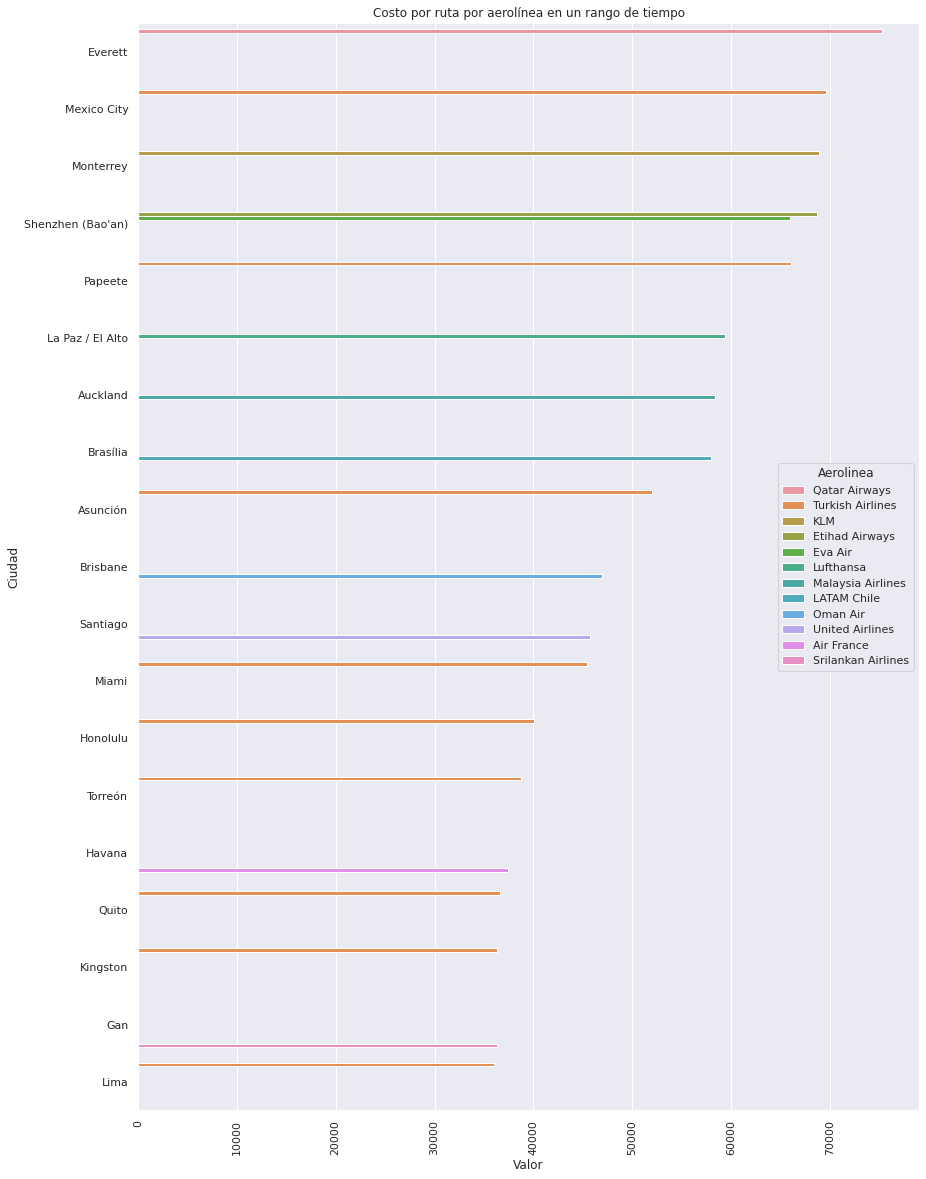

In [ ]:
sns.set(rc={"figure.figsize":(14,20)})
sns.barplot(x ="Valor", y ="Ciudad", data = df_ciudades_aerolineas_fecha_g, hue = 'Aerolinea')
plt.title("Costo por ruta por aerolínea en un rango de tiempo")
plt.xticks(rotation= 90);
plt.show()
#Mostrar los 10 más relevantes con respecto al recaudo